### 1. Import Dependencies

In [2]:
import os
import pandas as pd #alias
import numpy as np #alias
import seaborn as sns
from matplotlib import pyplot as plt

### 2. Basic Processing

In [4]:
df = pd.read_csv("processed\Missing_values_handled.csv")
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44.00,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50.00,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29.00,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44.00,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27.00,2,134603.88,1,1,1,71725.73,0


In [6]:
print(f"No of rows : {len(df)}") 

No of rows : 10000


### 3. Outlier detection techniques

#### 3.1 Distribution plots

Categorical Variables 
 - Nominal (Geography, Gender, HasCrCard, IsActiveMember, Exited(Exited is the target - churned or not))
 - Ordinal (NumOfProducts)

Numerical Variables 
 - Discrete ()
 - Continues (Age, Balance, EstimatedSalary, Tenure, CreditScore)
---
 - Discrete Numerical variable means its Categorical.
 - Categorical dont always have to has a  String variable.
    - Gender ( Male - 1 / Female - 0) - its not Numerical, its Categorical

In [7]:
categorical_columns = [
                        'Geography',
                        'Gender',
                        'HasCrCard',
                        'IsActiveMember',
                        'NumOfProducts',
                        'Exited'
                    ]

numerical_columns = [
                        'Age', 
                        'Balance',
                        'EstimatedSalary',
                        'Tenure',
                        'CreditScore'
                    ]

#### 3.1.1 Plotting Numerical Columns

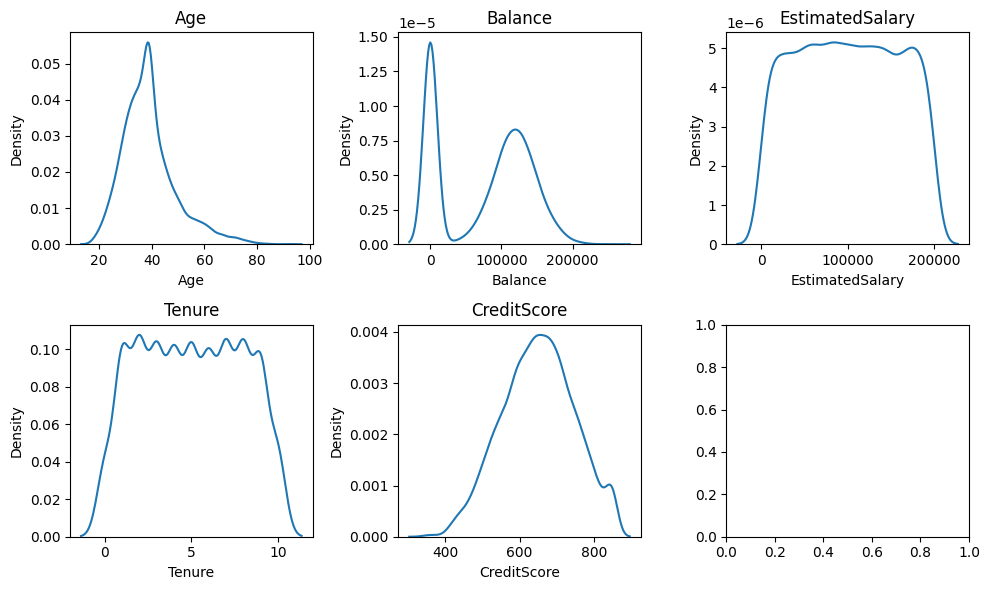

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(
                data=df[col], 
                ax = axes[idx]
                )
    axes[idx].set_title(col)
    
plt.tight_layout()

plt.show()

- The Age is Right Scewed - Not normal distributed
- Tenure is Uniformed
- Credit Score is a normal distribution (amlost) 
- Balance has two modalities ( modality means a peak in the grapgh) - balance have 2 peaks we call it Bi-Modal. data set has two distributions that merged.
    - 0 means - a lot of people doesnt maintain their account that why it has a peak.
- Estimated salary is pretty much uniformed.

#### 3.1.2 Plotting Categorical Columns

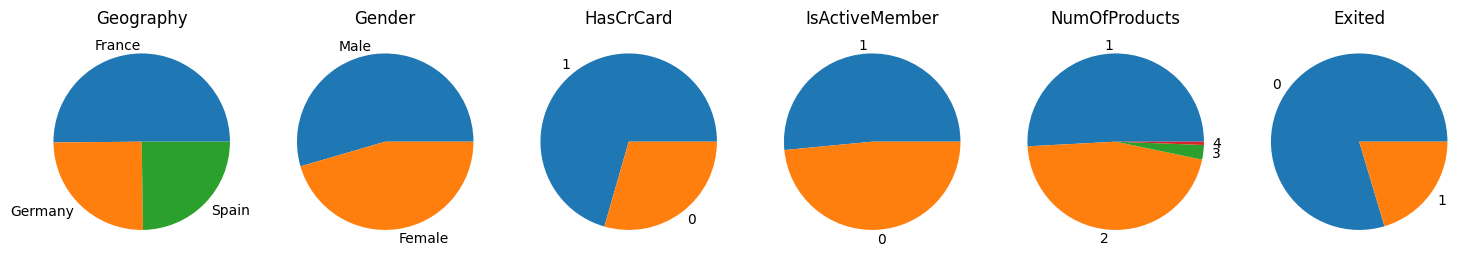

In [9]:
fig, axes = plt.subplots(1, 6, figsize=(15, 10))

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
                                kind='pie',
                                ax=axes[idx]
                                )
    
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

plt.tight_layout()

plt.show()


#### 3.2 Box plots

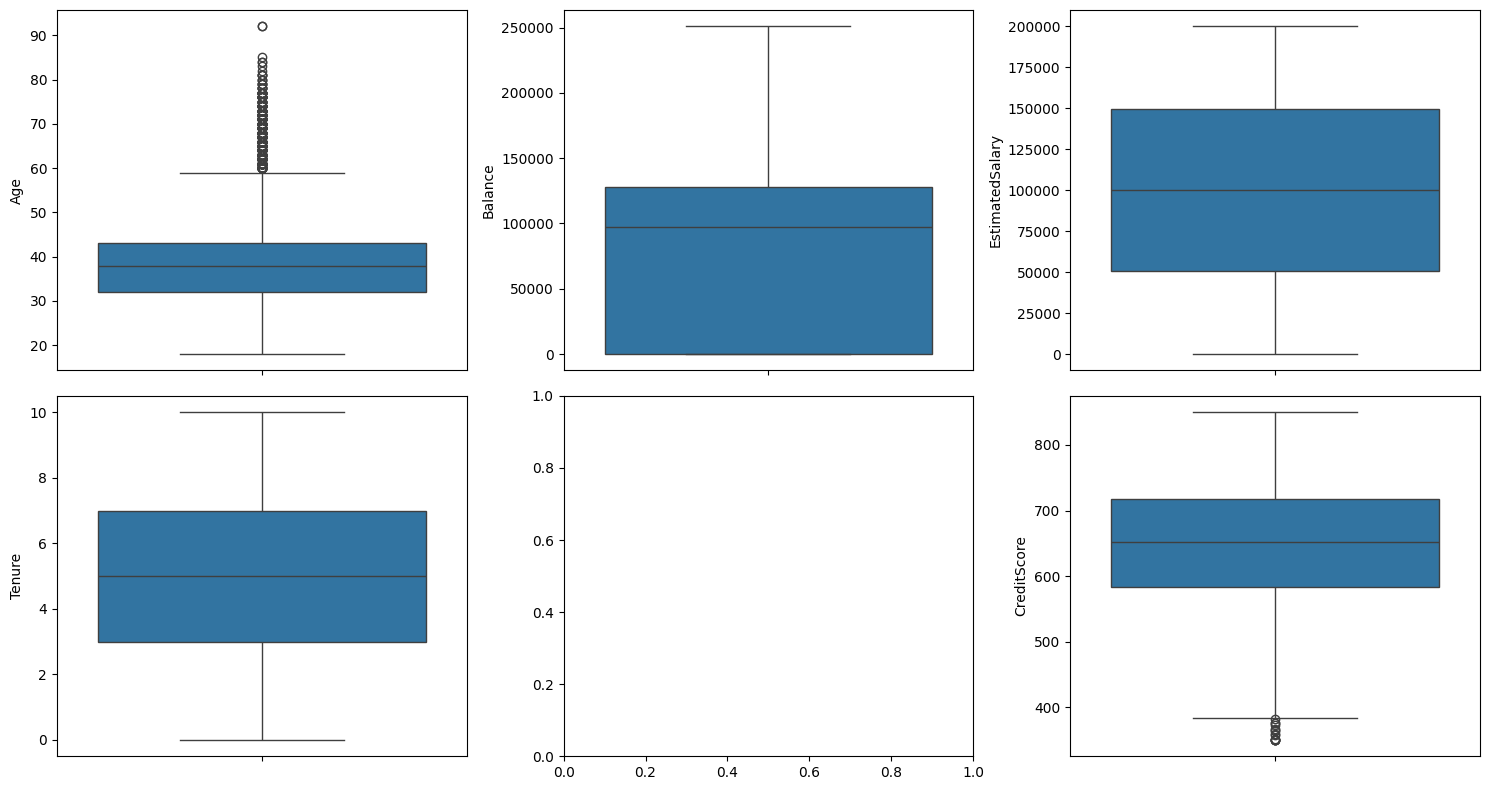

In [10]:
numerical_columns = [
                        'Age', 
                        'Balance',
                        'EstimatedSalary',
                        'Tenure',
                        'CreditScore'
                    ]



fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.boxplot(data=df['Age'], ax=axes[0,0])
sns.boxplot(data=df['Balance'], ax=axes[0,1])
sns.boxplot(data=df['EstimatedSalary'], ax=axes[0,2])
sns.boxplot(data=df['Tenure'], ax=axes[1,0])
sns.boxplot(data=df['CreditScore'], ax=axes[1,2])

plt.tight_layout()
plt.show()

Since the 'Age' has lots of anomalies, but we cant exactly say they are anomalies. (there might be people who are 99 - 110 years old)

#### 3.3 Empirical Rule / 3-Sigma Rule
(calculate the anomalies)

this depicts : the value should be on the bound of,
- upper bound = mean + (3 * std)
- lower bound = mean - (3 * std)   //std = standard deviation

In [11]:
def find_anomaly(data):
    
    mean = data.mean()
    std = data.std()  
    
    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)
    
    return (data > upper_bound) | (data < lower_bound)

- False = it's not a anomaly
- True = it's a anomaly

In [12]:
numerical_columns = [
                        'Age', 
                        'Balance',
                        'EstimatedSalary',
                        'Tenure',
                        'CreditScore'
                    ]

for col in numerical_columns:
    num_outliers = find_anomaly(df[col])
    num_outliers_sum = find_anomaly(df[col]).sum()
    num_outliers_percentage = round(num_outliers_sum/ len(df), 3)
    print(f"{col} : {num_outliers_sum} outliers ({num_outliers_percentage} %)")

Age : 144 outliers (0.014 %)
Balance : 0 outliers (0.0 %)
EstimatedSalary : 0 outliers (0.0 %)
Tenure : 0 outliers (0.0 %)
CreditScore : 8 outliers (0.001 %)


#### 3.4 IQR Method
(calculate the anomalies)

- In this we need the percentiles (Q1, Q3) 
- you can find the percentiles when you organize the data from accending order, based on the index you can find the percentiles

In [13]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    return (data > upper_bound) | (data < lower_bound)

In [14]:
numerical_columns = [
                        'Age', 
                        'Balance',
                        'EstimatedSalary',
                        'Tenure',
                        'CreditScore'
                    ]

for col in numerical_columns:
    num_outliers = find_anomaly(df[col])
    num_outliers_sum = find_anomaly(df[col]).sum()
    num_outliers_percentage = round(num_outliers_sum/ len(df), 3)
    print(f"{col} : {num_outliers_sum} outliers ({num_outliers_percentage} %)")

Age : 501 outliers (0.05 %)
Balance : 0 outliers (0.0 %)
EstimatedSalary : 0 outliers (0.0 %)
Tenure : 0 outliers (0.0 %)
CreditScore : 15 outliers (0.002 %)


- The outliers removing is solely depend on the domain and business perspective.
- You can only argue with the others whether or not remove the detected outliers or not.
- Its not up to you to remove outliers, you should first talk and argue with the other people to get a decision.

In [16]:
df.to_csv('processed/ChurnModelling_Outliers_Handled.csv', index=False)